In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# EDA

In [2]:
# Dataset 1 : Economy class tickets
df_eco = pd.read_csv('economy.csv')
dfe = df_eco[df_eco['from']== 'Delhi']  
dfe = dfe[dfe['to']== 'Mumbai']

In [212]:
dfe[]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
9979,31-03-2022,GO FIRST,G8,188,16:40,Delhi,04h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:20,Mumbai,"8,007"
9980,31-03-2022,GO FIRST,G8,268,12:00,Delhi,09h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:20,Mumbai,"8,007"
9981,31-03-2022,GO FIRST,G8,191,09:25,Delhi,09h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:25,Mumbai,"8,275"
9982,31-03-2022,GO FIRST,G8,191,09:25,Delhi,09h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:30,Mumbai,"8,275"


In [213]:
price=[]
for i in dfe['price']:
    price.append(i.replace(',',''))


In [214]:
dfe['price']= price

In [215]:
dfe['date'].nunique()

49

In [216]:
dfe

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955
...,...,...,...,...,...,...,...,...,...,...,...
9979,31-03-2022,GO FIRST,G8,188,16:40,Delhi,04h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:20,Mumbai,8007
9980,31-03-2022,GO FIRST,G8,268,12:00,Delhi,09h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:20,Mumbai,8007
9981,31-03-2022,GO FIRST,G8,191,09:25,Delhi,09h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:25,Mumbai,8275
9982,31-03-2022,GO FIRST,G8,191,09:25,Delhi,09h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:30,Mumbai,8275


In [217]:
dfe['date'].unique()

array(['11-02-2022', '12-02-2022', '13-02-2022', '14-02-2022',
       '15-02-2022', '16-02-2022', '17-02-2022', '18-02-2022',
       '19-02-2022', '20-02-2022', '21-02-2022', '22-02-2022',
       '23-02-2022', '24-02-2022', '25-02-2022', '26-02-2022',
       '27-02-2022', '28-02-2022', '01-03-2022', '02-03-2022',
       '03-03-2022', '04-03-2022', '05-03-2022', '06-03-2022',
       '07-03-2022', '08-03-2022', '09-03-2022', '10-03-2022',
       '11-03-2022', '12-03-2022', '13-03-2022', '14-03-2022',
       '15-03-2022', '16-03-2022', '17-03-2022', '18-03-2022',
       '19-03-2022', '20-03-2022', '21-03-2022', '22-03-2022',
       '23-03-2022', '24-03-2022', '25-03-2022', '26-03-2022',
       '27-03-2022', '28-03-2022', '29-03-2022', '30-03-2022',
       '31-03-2022'], dtype=object)

In [218]:
dfe= dfe.astype({"price": np.float64})

In [219]:
dfe['date'].unique()

array(['11-02-2022', '12-02-2022', '13-02-2022', '14-02-2022',
       '15-02-2022', '16-02-2022', '17-02-2022', '18-02-2022',
       '19-02-2022', '20-02-2022', '21-02-2022', '22-02-2022',
       '23-02-2022', '24-02-2022', '25-02-2022', '26-02-2022',
       '27-02-2022', '28-02-2022', '01-03-2022', '02-03-2022',
       '03-03-2022', '04-03-2022', '05-03-2022', '06-03-2022',
       '07-03-2022', '08-03-2022', '09-03-2022', '10-03-2022',
       '11-03-2022', '12-03-2022', '13-03-2022', '14-03-2022',
       '15-03-2022', '16-03-2022', '17-03-2022', '18-03-2022',
       '19-03-2022', '20-03-2022', '21-03-2022', '22-03-2022',
       '23-03-2022', '24-03-2022', '25-03-2022', '26-03-2022',
       '27-03-2022', '28-03-2022', '29-03-2022', '30-03-2022',
       '31-03-2022'], dtype=object)

In [220]:
dfe = dfe.groupby(by='date',sort=False)['price'].mean()

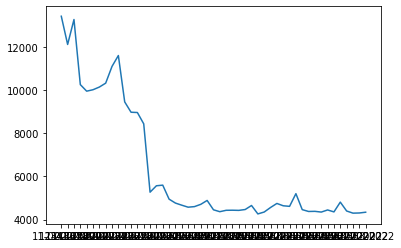

In [222]:
plt.plot(dfe.index,dfe)

In [49]:
dfe = dfe.groupby(by='date')['price'].sum()

In [53]:
plt.plot(dfe[0],int(dfe[1]))

ValueError: invalid literal for int() with base 10: '2,4762,4762,7002,7002,7002,7002,7002,7002,7002,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4102,4092,4092,4092,4092,4092,4092,4092,40

In [23]:
dfe['date']= pd.to_datetime(dfe['date'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16-02-2022' in DD/MM/YYYY format. Provide format or specif

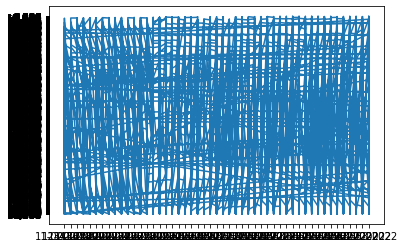

In [4]:
plt.plot(de['date'],dfe['price'])

In [3]:
# Dataset 2: Business class tickets
df_bus = pd.read_csv('business.csv')
df_bus.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


Checking if data sets have any Null values

In [4]:
df_eco.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [5]:
df_bus.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

# Information about the data


In [6]:
df_eco.info()
df_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  ob

We create a new dataset by combining economy and business class tickets as we have same columns in both.
A new column class is added to the dataset.
Flight column is created by combining ch_code and num_code

In [7]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [9]:
#Dropping Unnamed column
df = df.drop('Unnamed: 0', axis = 1)

In [10]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [11]:
df.corr().T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [12]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

There are 6 unique airlines.
There are 6 unique source and destination cities.
In arrival and departure time columns,there are 6 different timings.
There are 2 classes - Economy and Business.

This helps us understand the unique elements in each feature.

In [13]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


# Different flights (based on flight code) of each airline


In [14]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

# Total number of flights of each airline

In [15]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

Vistara is the most chosen airlines followed by Air India and Indigo

<AxesSubplot:xlabel='airline', ylabel='count'>

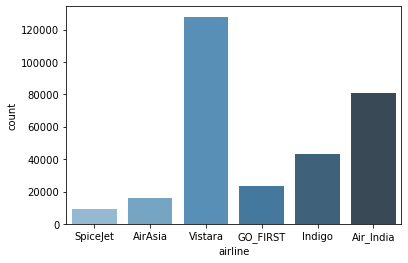

In [16]:
sns.countplot(x='airline',data=df,palette="Blues_d")

# Number of economy and business class tickets of all airlines

In [17]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

As one would expect, very few people opt for the business class.

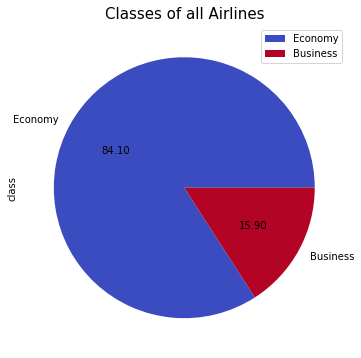

In [18]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='coolwarm')
plt.title('Classes of all Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

# Ticket Price Variation between Economy and the Business classes

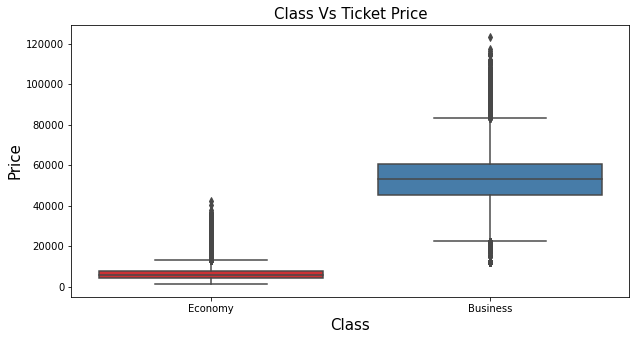

In [19]:
 plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='Set1')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Business class has higher price range

# Ticket price range of different airlines

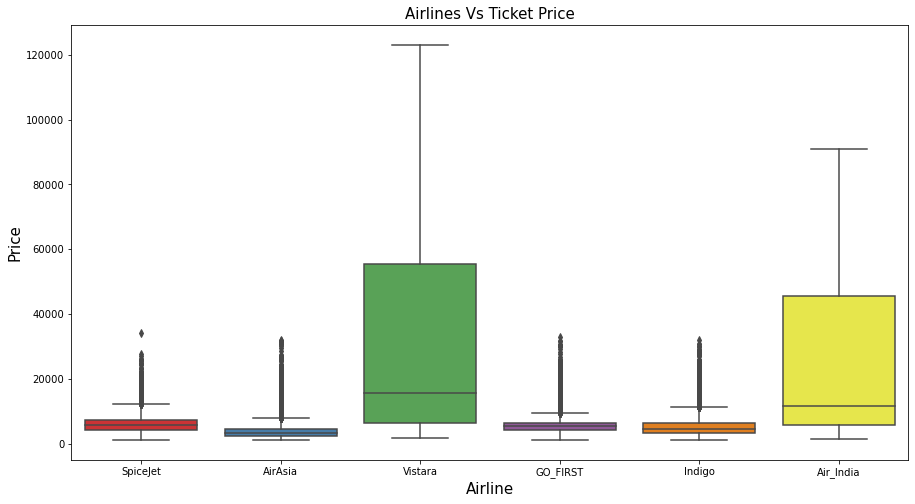

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['airline'],y=df['price'],palette='Set1')
plt.title('Airlines Vs Ticket Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Vistara airlines has the maximum price range.
AirIndia airlines has the second highest price range and the remaining airlines are priced at almost the same range.

# Difference between price of economy and business class


<AxesSubplot:xlabel='airline', ylabel='price'>

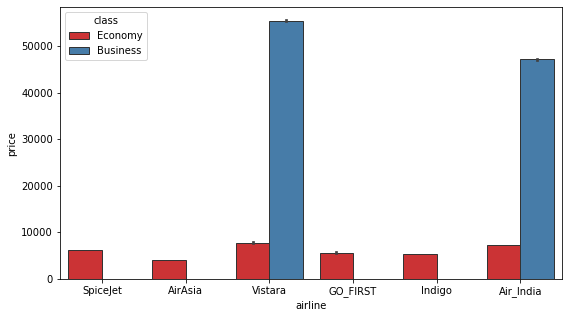

In [21]:
plt.figure(figsize=(9,5))
sns.barplot(x = 'airline',y='price',data = df,hue = 'class',palette='Set1',edgecolor=".2")

# Variation of Ticket price with number of stops


Only Vistara and AirIndia airlines have business class

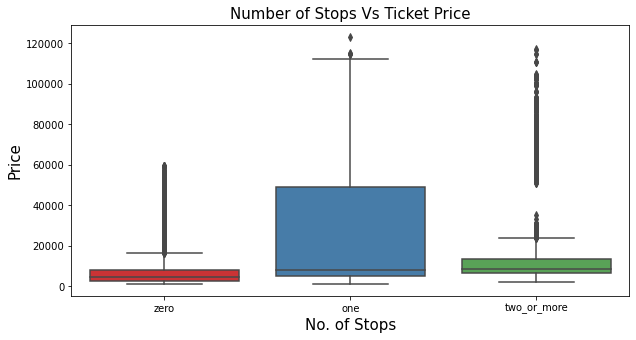

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='Set1')
plt.title('Number of Stops Vs Ticket Price',fontsize=15)
plt.xlabel('No. of Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Flights with zero stops have the minimum price and flights with one stop have maximum ticket price

# Variation of Ticket price with arrival time


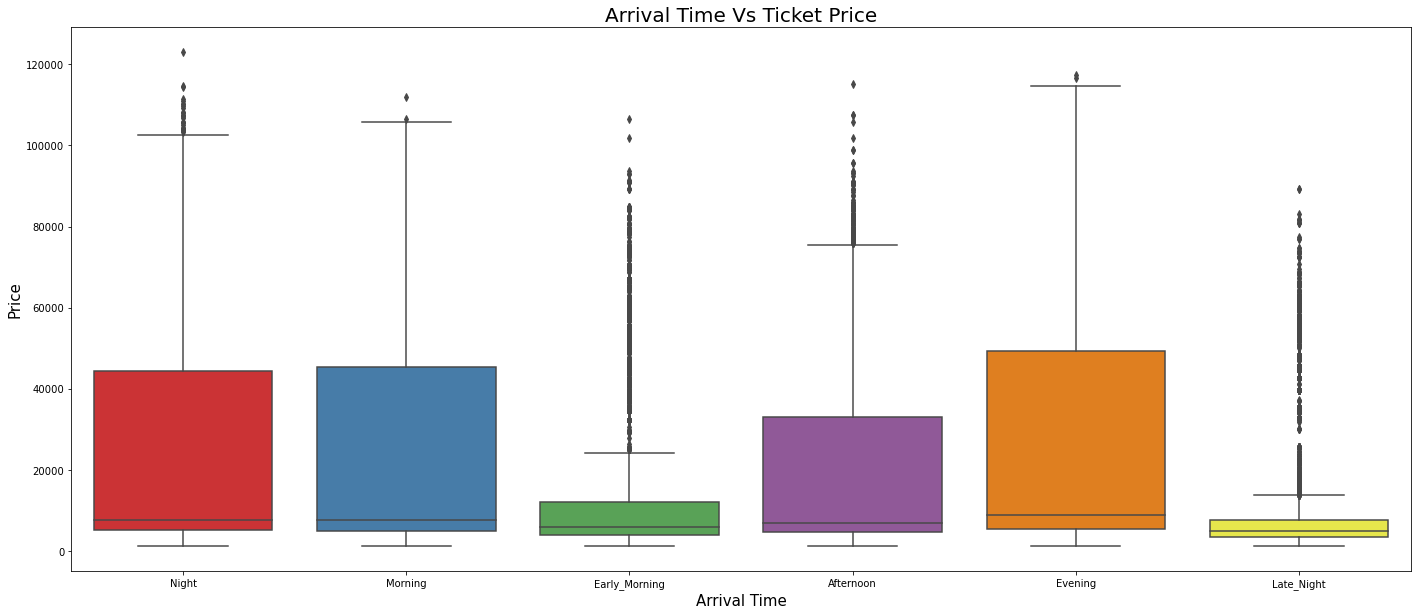

In [23]:
plt.figure(figsize=(24,10))
sns.boxplot(x='arrival_time',y='price',data=df,palette='Set1')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# Variation of Ticket price with departure time


Ticket price is higher for the flights arriving in the Evening and it's cheaper for the flights arriving Late Night

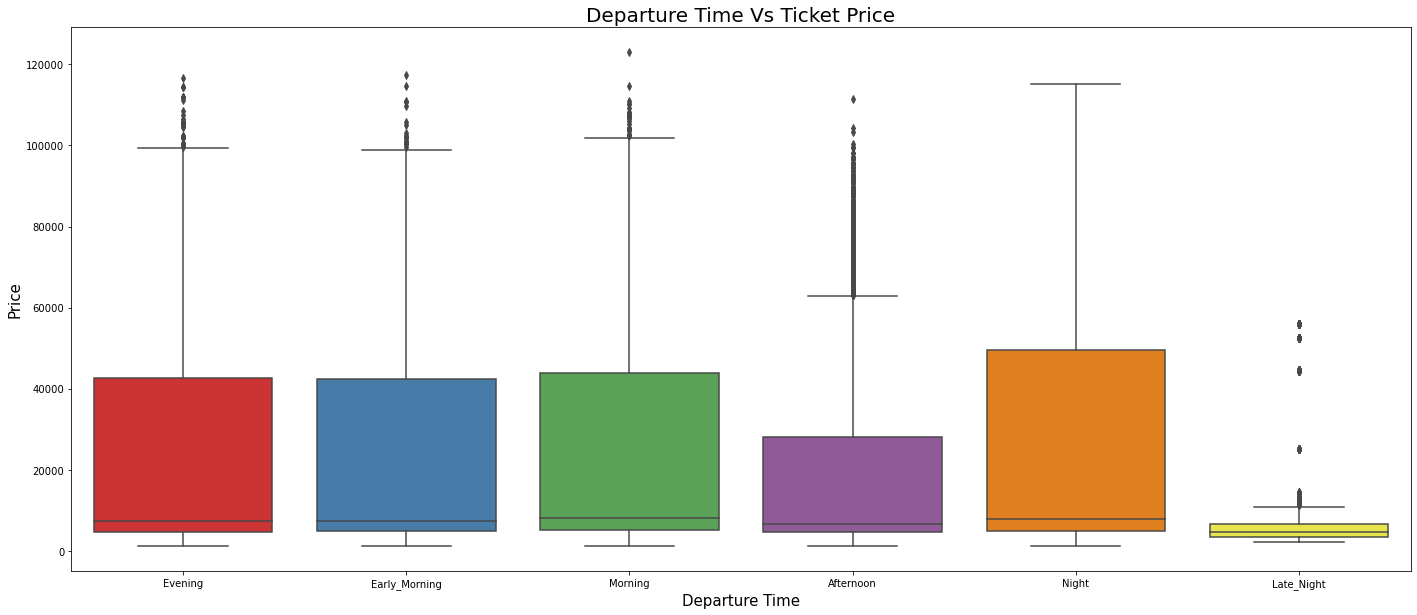

In [24]:
plt.figure(figsize=(24,10))
sns.boxplot(x='departure_time',y='price',data=df, palette="Set1")
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# Variation of Ticket price with the Source and Destination cities


Prices of flights departuring Late Night are the cheapest and highest for the one's departuring in the Night

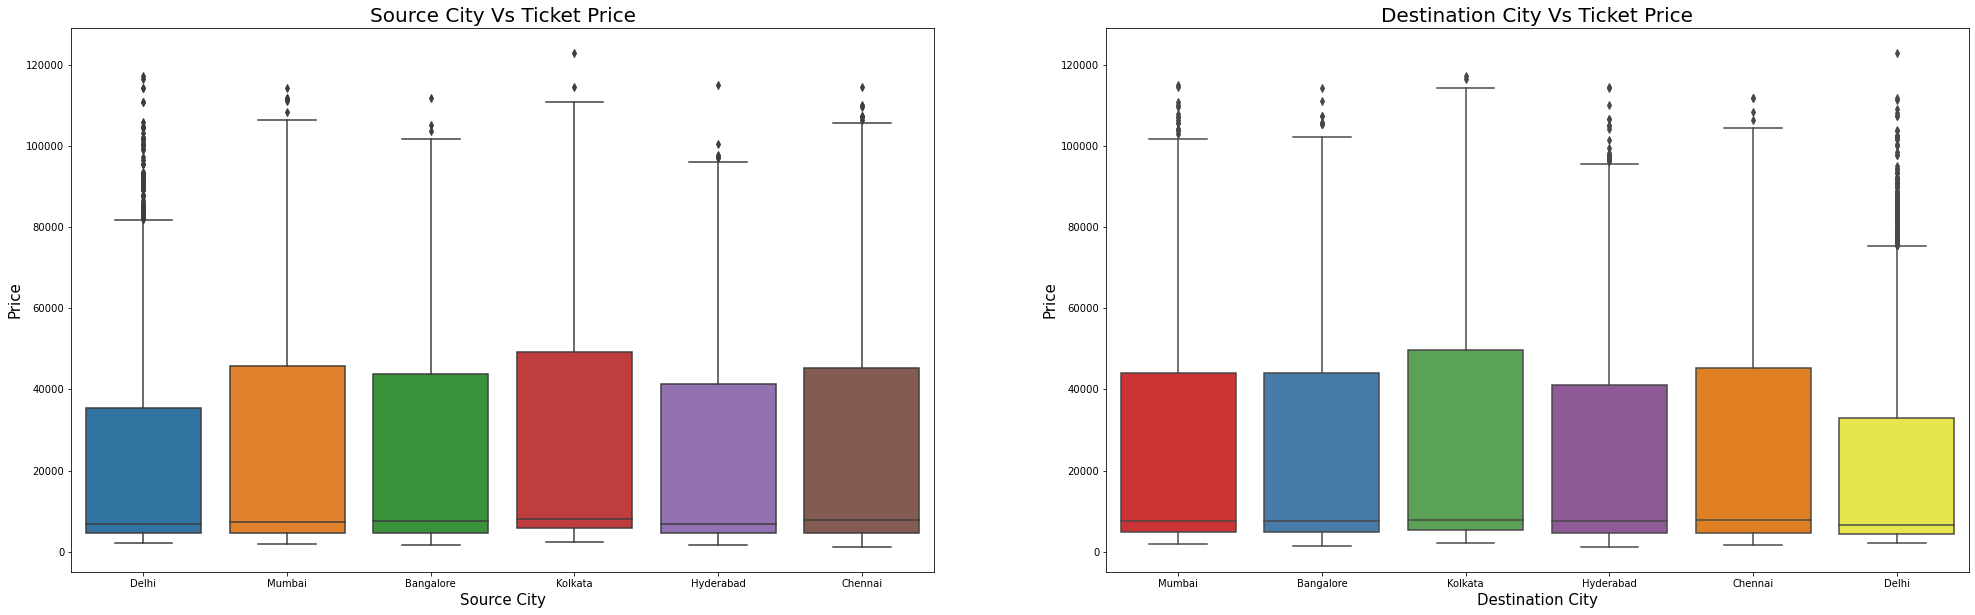

In [25]:
plt.figure(figsize=(34,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='Set1')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Ticket price is higher for the flights whose source city is Kolkata and low for flights with source city as Delhi. It's almost equal for Mumbai, Chennai, Hyderabad and Bangalore.
Flights with destination city as Kolkata has the highest price and Delhi has the lowest price.

# Variation of Economy and Business class ticket prices with duration of the flight


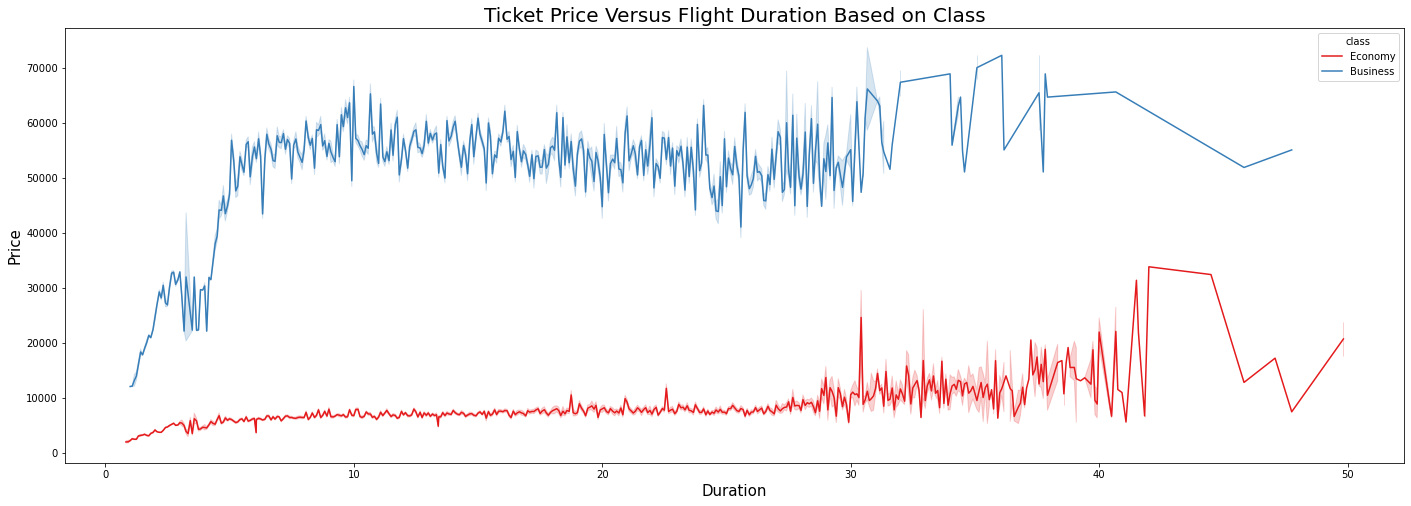

In [26]:
plt.figure(figsize=(24,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='Set1')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

The ticket price increases with the duration of the flight for both the classes

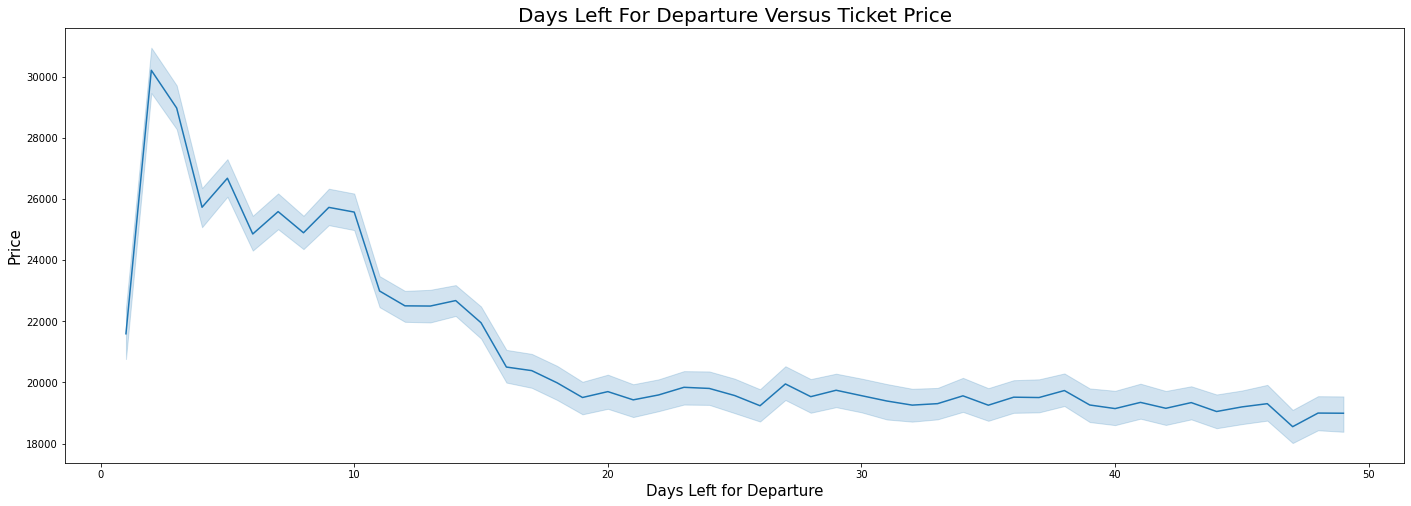

In [27]:
#Variation of ticket price with number of days left for Departure
plt.figure(figsize=(24,8))
sns.lineplot(data=df,x='days_left',y='price',palette='Set1')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

The ticket price increases as the number of days left for departure decrease and it reaches maximum and drops two days before the departure

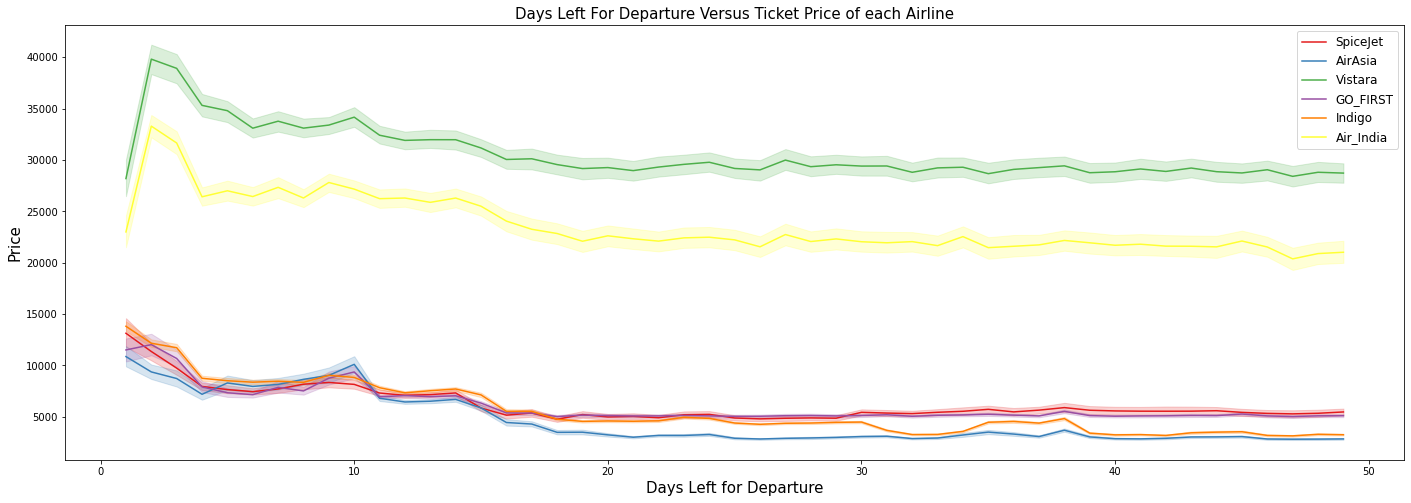

In [28]:
#Variation of ticket price of different airlines with number of days left for Departure
plt.figure(figsize=(24,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='Set1')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# Correlation amongst features

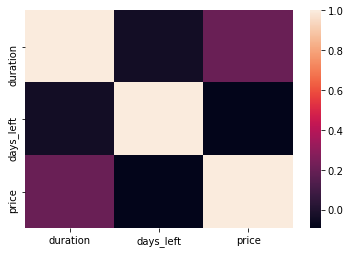

In [29]:
sns.heatmap(df.corr());

In [30]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Machine Learning Models 

## Feature Engineering

### Adding "Departure" and "Arrival" for ease of understanding and fututre model training.

In [31]:
df['departure_time']=df['departure_time'].map('{} departure'.format)
df['arrival_time']=df['arrival_time'].map('{} arrival'.format)

In [32]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening departure,zero,Night arrival,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning departure,zero,Morning arrival,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning departure,zero,Early_Morning arrival,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning departure,zero,Afternoon arrival,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning departure,zero,Morning arrival,Mumbai,Economy,2.33,1,5955


### Adding a new feature "Travelling Cities"

In [33]:
df["Travelling_Cities"] = df["source_city"] +'-' + df["destination_city"]
df['Travelling_Cities'].value_counts()
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Travelling_Cities
0,SpiceJet,SG-8709,Delhi,Evening departure,zero,Night arrival,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning departure,zero,Morning arrival,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning departure,zero,Early_Morning arrival,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning departure,zero,Afternoon arrival,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning departure,zero,Morning arrival,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai


### Getting rid of duplicate travelling cities by re-arraging cities 

In [34]:
df['Travelling_Cities'] = df.Travelling_Cities.replace('Delhi-Mumbai','Mumbai-Delhi')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Delhi-Bangalore','Bangalore-Delhi')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Bangalore-Mumbai','Mumbai-Bangalore')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Mumbai-Kolkata','Kolkata-Mumbai')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Delhi-Kolkata','Kolkata-Delhi')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Delhi-Chennai','Chennai-Delhi')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Mumbai-Hyderabad','Hyderabad-Mumbai')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Mumbai-Chennai','Chennai-Mumbai')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Bangalore-Kolkata','Kolkata-Bangalore')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Delhi-Hyderabad','Hyderabad-Delhi')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Bangalore-Hyderabad','Hyderabad-Bangalore')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Hyderabad-Kolkata','Kolkata-Hyderabad')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Chennai-Kolkata','Kolkata-Chennai')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Chennai-Bangalore','Bangalore-Chennai')
df['Travelling_Cities'] = df.Travelling_Cities.replace('Hyderabad-Chennai','Chennai-Hyderabad') 

In [35]:
df['Travelling_Cities'].value_counts()

Mumbai-Delhi           30098
Bangalore-Delhi        27768
Mumbai-Bangalore       25824
Kolkata-Mumbai         24069
Kolkata-Delhi          22440
Chennai-Delhi          20563
Hyderabad-Mumbai       20534
Kolkata-Bangalore      19852
Chennai-Mumbai         19468
Hyderabad-Delhi        17834
Hyderabad-Bangalore    16782
Kolkata-Hyderabad      15884
Kolkata-Chennai        13636
Bangalore-Chennai      12903
Chennai-Hyderabad      12498
Name: Travelling_Cities, dtype: int64

## More data visualization

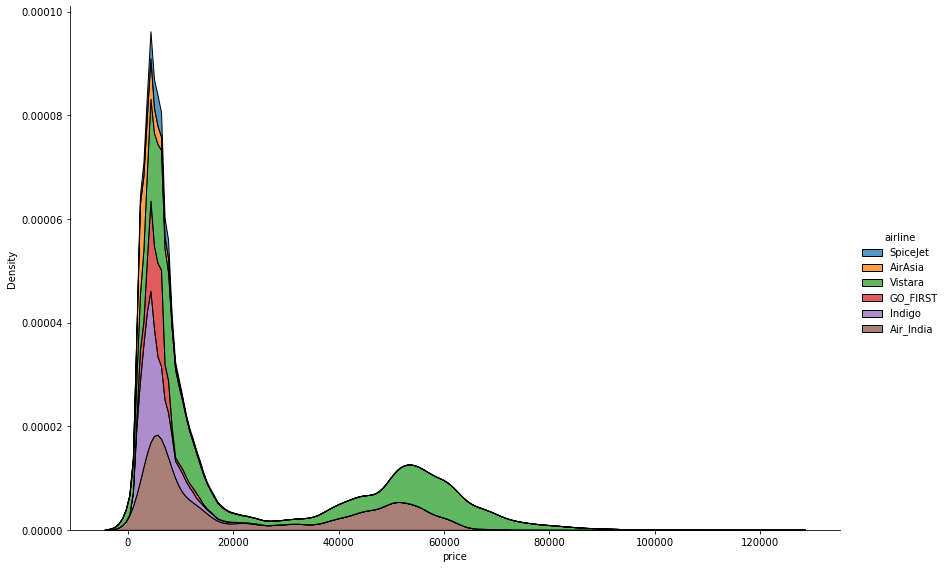

In [36]:
sns.displot(x="price", hue="airline", kind="kde",
            multiple="stack",data=df,height=8, aspect=15/10)

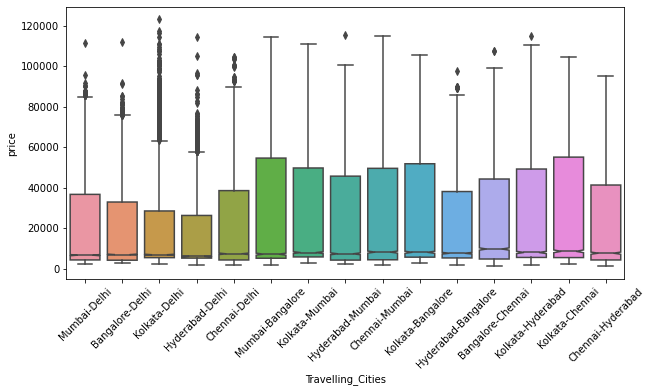

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Travelling_Cities',y='price',notch= True,data=df).tick_params(axis='x', rotation=45)

<AxesSubplot:ylabel='Travelling_Cities'>

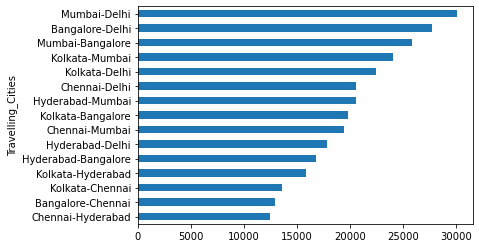

In [38]:
df.groupby(['Travelling_Cities'])['Travelling_Cities'].count().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='airline'>

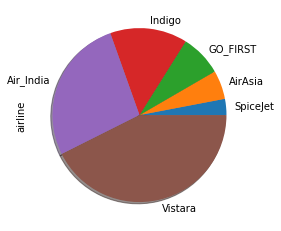

In [39]:
df.groupby(['airline'])['airline'].count().sort_values().plot(kind='pie', shadow=True)

Heavily travelled locations are Mumbai-Delhi and Banglore-Delhi

# Creating Dummy Variables for Numerical Data and Outlier Management

In [40]:
df["days_left"].mean() # we choose 26 as the booking theshhold since that is the mean value here.
df['booking_before_one_month'] = ['Yes' if x > 26 else "No" for x in df['days_left']]

In [41]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Travelling_Cities,booking_before_one_month
0,SpiceJet,SG-8709,Delhi,Evening departure,zero,Night arrival,Mumbai,Economy,2.17,1,5953,Mumbai-Delhi,No
1,SpiceJet,SG-8157,Delhi,Early_Morning departure,zero,Morning arrival,Mumbai,Economy,2.33,1,5953,Mumbai-Delhi,No
2,AirAsia,I5-764,Delhi,Early_Morning departure,zero,Early_Morning arrival,Mumbai,Economy,2.17,1,5956,Mumbai-Delhi,No
3,Vistara,UK-995,Delhi,Morning departure,zero,Afternoon arrival,Mumbai,Economy,2.25,1,5955,Mumbai-Delhi,No
4,Vistara,UK-963,Delhi,Morning departure,zero,Morning arrival,Mumbai,Economy,2.33,1,5955,Mumbai-Delhi,No


C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution Of Flight Tickets Prices'),
 Text(0, 0.5, 'Density')]

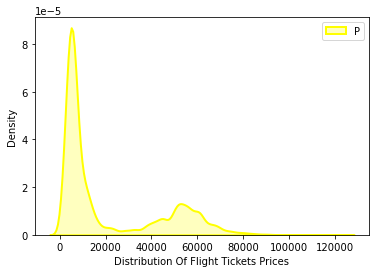

In [42]:
display(sns.distplot(df["price"], hist=False, kde=True, bins=int(180/5), color = 'yellow', hist_kws={'edgecolor':'black'},kde_kws={'shade': True,'linewidth': 2}).set(xlabel='Distribution Of Flight Tickets Prices', ylabel='Density'))
plt.legend('Price', ncol=2, loc='upper right')

### Making a plot function to check outliers in prices before and after management 

In [43]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1,color='m')
    sns.boxplot(data[col],ax=ax2,color='darkred')

C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


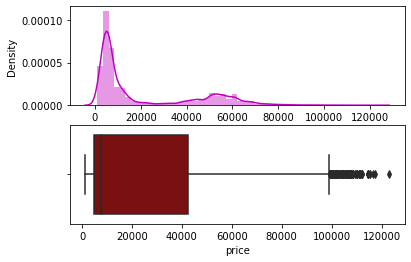

In [44]:
plot(df,'price')

As evident from the above plot, there are outliers present after approximately price value of 98000

In [45]:
df['new_price']=np.where(df['price']>=98000,df['price'].median(),df['price'])


In [46]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Travelling_Cities,booking_before_one_month,new_price
0,SpiceJet,SG-8709,Delhi,Evening departure,zero,Night arrival,Mumbai,Economy,2.17,1,5953,Mumbai-Delhi,No,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning departure,zero,Morning arrival,Mumbai,Economy,2.33,1,5953,Mumbai-Delhi,No,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning departure,zero,Early_Morning arrival,Mumbai,Economy,2.17,1,5956,Mumbai-Delhi,No,5956.0
3,Vistara,UK-995,Delhi,Morning departure,zero,Afternoon arrival,Mumbai,Economy,2.25,1,5955,Mumbai-Delhi,No,5955.0
4,Vistara,UK-963,Delhi,Morning departure,zero,Morning arrival,Mumbai,Economy,2.33,1,5955,Mumbai-Delhi,No,5955.0


## One Hot Encoding Categorical Variables

In [47]:
df1=pd.get_dummies(df['airline'],drop_first=True)
df2=pd.get_dummies(df['class'],drop_first=True)
df3=pd.get_dummies(df['departure_time'],drop_first=True)
df4=pd.get_dummies(df['stops'],drop_first=True)
df5=pd.get_dummies(df['arrival_time'],drop_first=True)
df6=pd.get_dummies(df['booking_before_one_month'],drop_first=True)
df7=pd.get_dummies(df['Travelling_Cities'],drop_first=True)
final_df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df[['duration','price']]],axis=1)

In [48]:
final_df.head()

,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Economy,Early_Morning departure,Evening departure,Late_Night departure,Morning departure,...,Hyderabad-Mumbai,Kolkata-Bangalore,Kolkata-Chennai,Kolkata-Delhi,Kolkata-Hyderabad,Kolkata-Mumbai,Mumbai-Bangalore,Mumbai-Delhi,duration,price
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,2.17,5953
1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,2.33,5953
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,2.17,5956
3,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,2.25,5955
4,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,2.33,5955


In [49]:
final_df.columns

Index(['Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara', 'Economy',
       'Early_Morning departure', 'Evening departure', 'Late_Night departure',
       'Morning departure', 'Night departure', 'two_or_more', 'zero',
       'Early_Morning arrival', 'Evening arrival', 'Late_Night arrival',
       'Morning arrival', 'Night arrival', 'Yes', 'Bangalore-Delhi',
       'Chennai-Delhi', 'Chennai-Hyderabad', 'Chennai-Mumbai',
       'Hyderabad-Bangalore', 'Hyderabad-Delhi', 'Hyderabad-Mumbai',
       'Kolkata-Bangalore', 'Kolkata-Chennai', 'Kolkata-Delhi',
       'Kolkata-Hyderabad', 'Kolkata-Mumbai', 'Mumbai-Bangalore',
       'Mumbai-Delhi', 'duration', 'price'],
      dtype='object')

## Creating a Test-Train Split

In [57]:
X = final_df.drop(['price'],axis=1)
y = final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [58]:
mmscaler=MinMaxScaler(feature_range=(0,1))
X_train=mmscaler.fit_transform(X_train)
X_test=mmscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)  

In [59]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
res=pd.DataFrame(a)
res.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


## Importing Model libraries

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
bg = BaggingRegressor()
ran = RandomForestRegressor()
svr = SVR()
xgr = xgb.XGBRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
etr = ExtraTreesRegressor()
re=Ridge()
lin_lasso=linear_model.Lasso(alpha=0.1)

In [62]:
m=[lr, dt, bg, ran]#, svr, xgr, knn, etr, re, lin_lasso]

## Training and Testing to see performance of each model 

In [63]:
for models in m:
    
    models.fit(X_train, y_train)
    y_pred = models.predict(X_test)    
    print('Model: ', models)
    
    # Printing Performance Metrics for each model
    print('Model Name: ', models)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    print('Mean Absolute Percentage Error (MAPE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    
    
    # Storing the metrics in res
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : metrics.mean_squared_error(y_test, y_pred),
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    res = res.append(new_row, ignore_index=True)

Model:  LinearRegression()
Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4687.592
Mean Squared Error (MSE): 46638654.082
Root Mean Squared Error (RMSE): 6829.25
R2_score: 0.909786
Root Mean Squared Log Error (RMSLE): 8.829
Mean Absolute Percentage Error (MAPE): 46638654.082
Adjusted R Square:  0.909776
------------------------------------------------------------------------------------------------------------
Model:  DecisionTreeRegressor()
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 3521.042
Mean Squared Error (MSE): 40736191.828
Root Mean Squared Error (RMSE): 6382.491
R2_score: 0.921203
Root Mean Squared Log Error (RMSLE): 8.761
Mean Absolute Percentage Error (MAPE): 40736191.828
Adjusted R Square:  0.921194
------------------------------------------------------------------------------------------------------------
Model:  BaggingRegressor()
Model Name:  BaggingRegressor()
Mean Absolute Error (MAE): 3228.471
Mean Squared Error (MSE): 32143430.114
Roo

## Models and their Performances

In [64]:
res

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4687.591986,0.909776,6829.249892,4.663865e+07,4.663865e+07,8.828970,0.909786
1,DecisionTreeRegressor(),3521.041950,0.921194,6382.491036,4.073619e+07,4.073619e+07,8.761314,0.921203
2,(DecisionTreeRegressor(random_state=191780720)...,3228.470556,0.937817,5669.517626,3.214343e+07,3.214343e+07,8.642859,0.937824
3,"(DecisionTreeRegressor(max_features='auto', ra...",3204.939368,0.939063,5612.463062,3.149974e+07,3.149974e+07,8.632745,0.939070


In [65]:
models=['LinearRegression','DecisionTreeRegressor','BaggingRegressor','RandomForestRegressor']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=res['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=res['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=res['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=res['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=res['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=res['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=res['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor,0.939063,3204.939368,5612.463062,3.149974e+07,3.149974e+07,8.632745,0.939070
1,BaggingRegressor,0.937817,3228.470556,5669.517626,3.214343e+07,3.214343e+07,8.642859,0.937824
2,DecisionTreeRegressor,0.921194,3521.041950,6382.491036,4.073619e+07,4.073619e+07,8.761314,0.921203
3,LinearRegression,0.909776,4687.591986,6829.249892,4.663865e+07,4.663865e+07,8.828970,0.909786


From the above table, we could see that the top two performing models are Random forest and Bagging Regressor.

## Training the Data with Random Forest Regressor and plotting Actual Price vs Predicted Price

In [69]:
df_copy=df.copy()
#Trainig the model with random forest
ran.fit(X_train, y_train)
    
# Predict the model with test data

y_pred = ran.predict(X_test)
output_with_pred=pd.DataFrame({'ActualPrice':y_test,'PredictedPrice':y_pred})
result=df_copy.merge(output_with_pred,left_index=True,right_index=True)
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Travelling_Cities,booking_before_one_month,new_price,ActualPrice,PredictedPrice
206301,Indigo,6E-7208,Chennai,Early_Morning departure,one,Afternoon arrival,Hyderabad,Economy,7.67,45,2827,Chennai-Hyderabad,Yes,2827.0,2827,2600.768896
261681,Vistara,UK-706,Kolkata,Morning departure,zero,Afternoon arrival,Delhi,Business,2.33,9,38590,Kolkata-Delhi,No,38590.0,38590,31446.136086
5762,GO_FIRST,G8-354,Delhi,Night departure,zero,Late_Night arrival,Mumbai,Economy,2.17,30,2410,Mumbai-Delhi,Yes,2410.0,2410,2347.695495
105588,GO_FIRST,G8-146,Bangalore,Evening departure,two_or_more,Early_Morning arrival,Kolkata,Economy,15.00,22,5177,Kolkata-Bangalore,No,5177.0,5177,8770.689993
121138,Air_India,AI-9741,Kolkata,Early_Morning departure,one,Evening arrival,Delhi,Economy,12.75,12,11844,Kolkata-Delhi,No,11844.0,11844,8950.005624
202287,Air_India,AI-545,Chennai,Evening departure,one,Afternoon arrival,Kolkata,Economy,20.83,46,3342,Kolkata-Chennai,Yes,3342.0,3342,5516.291650
170437,Vistara,UK-878,Hyderabad,Afternoon departure,one,Morning arrival,Bangalore,Economy,19.92,47,5441,Hyderabad-Bangalore,Yes,5441.0,5441,5626.818483
25865,Vistara,UK-747,Delhi,Early_Morning departure,zero,Morning arrival,Kolkata,Economy,2.08,34,4000,Kolkata-Delhi,Yes,4000.0,4000,4011.189178
142120,Indigo,6E-892,Kolkata,Afternoon departure,one,Night arrival,Bangalore,Economy,6.75,47,4944,Kolkata-Bangalore,Yes,4944.0,4944,4085.506223
69579,Vistara,UK-910,Mumbai,Evening departure,one,Morning arrival,Kolkata,Economy,16.00,45,6634,Kolkata-Mumbai,Yes,6634.0,6634,6078.814239


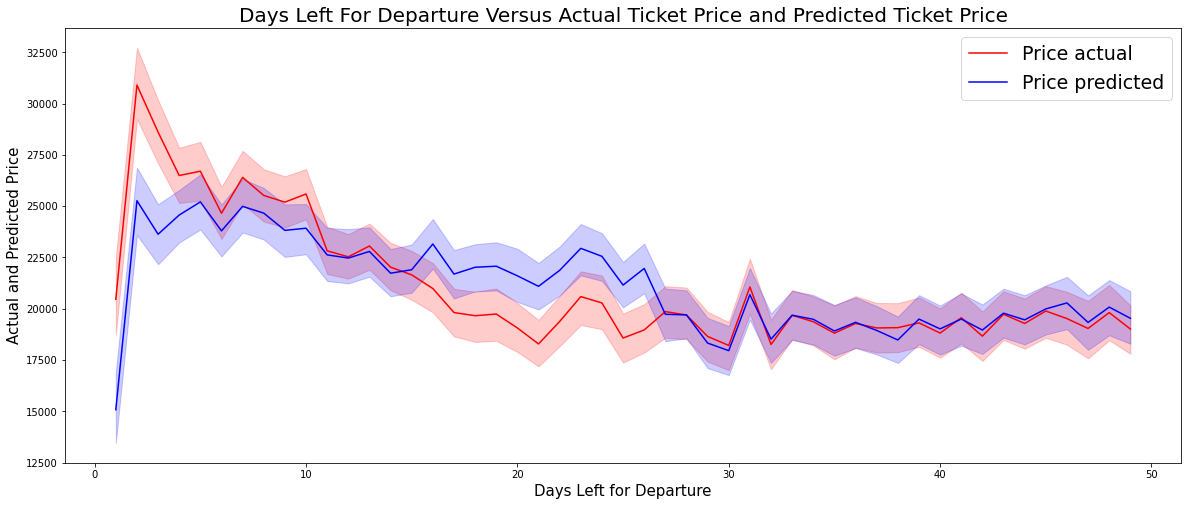

In [71]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='ActualPrice',color='red')
sns.lineplot(data=result,x='days_left',y='PredictedPrice',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()